In [3]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [4]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [5]:
np.random.seed(0)

In [6]:
import warnings; warnings.simplefilter('ignore')

In [7]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset(path_to_file="../Data/dataset2/train.csv")

In [8]:
y_test[y_test<=1] = 0
y_test[y_test>=2] = 1
y_train[y_train<=1] = 0
y_train[y_train>=2] = 1

In [104]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [17]:
rc_errors = {}
for i in range(2, 50):
    ica = FastICA(n_components=i, random_state=0)
    x_prime = ica.fit_transform(x_train_scaled)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(x_train_scaled, reconstructed)    
    rc_errors[i] = rc_err

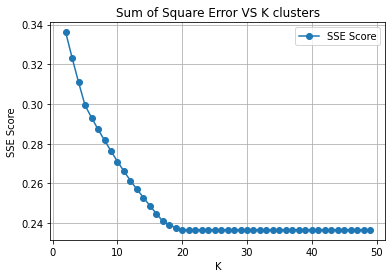

In [106]:
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()), 'o-', label="SSE Score")
plt.title(f"Sum of Square Error VS K clusters")
plt.xlabel("K")
plt.ylabel("SSE Score")
plt.grid()
plt.legend()
plt.show()

In [28]:
comp = 20
ica = FastICA(n_components=comp, random_state=0, max_iter=1000)
ica_result = ica.fit_transform(x_train_scaled)
for i in range(0, comp):
    x_train[f"ica-{i}"] = ica_result[:,i]

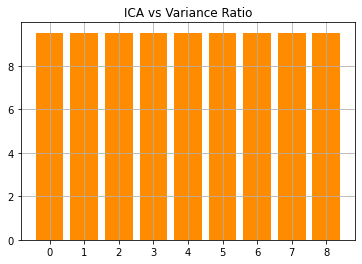

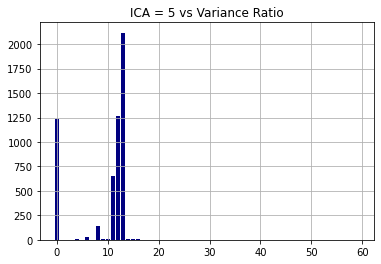

In [124]:
sums_ica = []
for i in range(1, 10):
    ica_f = FastICA(n_components=i, random_state=0)
    ica_f.fit_transform(x_train)
    sums_ica.append(sum(ica.mean_))

ica_f2 = FastICA(n_components=4, random_state=0)
ica_f2.fit_transform(x_train)

plt.figure()
plt.title(f"ICA vs Variance Ratio")
plt.bar(range(len(sums_ica)), sums_ica , color="darkorange")
plt.xticks(range(len(sums_ica)))
plt.grid()
plt.show()

plt.figure()
plt.title(f"ICA = 5 vs Variance Ratio")
plt.bar(range(len(ica_f2.mean_)), ica_f2.mean_, color='navy')
plt.grid()
plt.show()

In [118]:
ica_f2.mean_

array([ 1.23508258e+03,  4.92424242e-01,  1.54893939e+00,  5.11363636e-01,
        4.25000000e+00,  5.14393939e-01,  3.17954545e+01,  5.04545455e-01,
        1.38979545e+02,  4.50833333e+00,  9.80606061e+00,  6.54409091e+02,
        1.26618182e+03,  2.11720379e+03,  1.23318182e+01,  5.75378788e+00,
        1.10515152e+01,  7.56818182e-01,  4.94696970e-01,  5.12878788e-01,
        2.52323415e-18, -1.42983268e-18, -3.70074342e-18, -1.42983268e-18,
        4.75209098e-18, -2.69144976e-18,  5.63522293e-18,  2.18680293e-18,
        1.17750927e-18,  9.25185854e-18, -6.51835488e-18,  2.31296463e-18,
        5.38289951e-18,  6.05576195e-18, -6.22397756e-18,  9.04158903e-19,
       -5.63522293e-18, -1.30367098e-18, -1.00929366e-18, -2.27091073e-18,
        2.52323415e-18, -1.42983268e-18, -3.70074342e-18, -1.42983268e-18,
        4.75209098e-18, -2.69144976e-18,  5.63522293e-18,  2.18680293e-18,
        1.17750927e-18,  9.25185854e-18, -6.51835488e-18,  2.31296463e-18,
        5.38289951e-18,  

<AxesSubplot:xlabel='ica-0', ylabel='ica-1'>

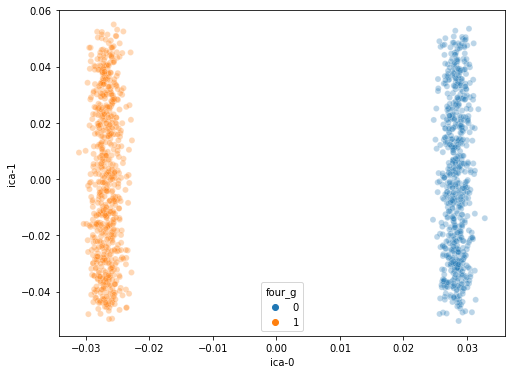

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="four_g",
    data=x_train,
    legend="full",
    alpha=0.3
)

In [32]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ica-10,ica-11,ica-12,ica-13,ica-14,ica-15,ica-16,ica-17,ica-18,ica-19
1520,1883,0,1.6,0,9,0,24,0.1,87,1,...,-0.029958,0.029763,-0.017002,-0.043119,-0.040829,0.027938,0.032000,-0.003505,0.041267,0.026245
64,702,0,2.6,1,2,1,9,0.7,141,3,...,-0.014530,-0.013860,0.020206,0.001609,0.044182,-0.028182,0.024566,-0.035939,-0.006669,0.026954
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,0.012754,0.029940,0.045596,-0.044734,-0.025983,-0.025790,0.041907,0.024769,-0.005542,-0.026680
926,1496,1,1.9,1,13,0,38,0.1,126,4,...,0.006948,0.028537,-0.048841,-0.007461,-0.022887,-0.025685,-0.008746,-0.014723,0.047761,-0.027083
983,1175,1,1.3,0,2,0,19,0.3,164,7,...,0.018338,-0.019790,0.009056,0.017179,-0.013438,0.028402,-0.003982,0.011824,-0.038822,-0.028324


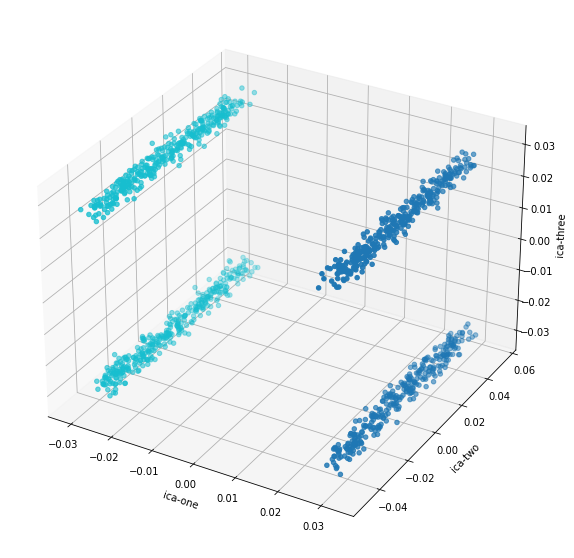

In [45]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["ica-0"], 
    ys=x_train["ica-1"], 
    zs=x_train["ica-2"], 
    c=x_train["four_g"], 
    cmap='tab10'
)
ax.set_xlabel('ica-one')
ax.set_ylabel('ica-two')
ax.set_zlabel('ica-three')
plt.show()

In [55]:
s = {}
h = {}
clusters = range(2, 25)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(ica_result)
    label = kmeans.labels_
    s[cluster] = silhouette_score(ica_result, label, metric='euclidean')
    h[cluster] = homogeneity_score(y_train['price_range'].values, label)

In [58]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

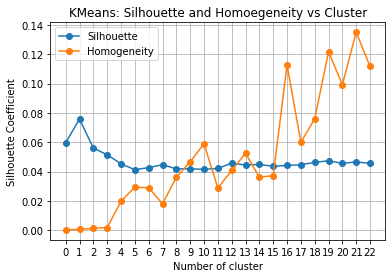

In [125]:
plt.figure()
plt.title("KMeans: Silhouette and Homoegeneity vs Cluster")
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.xticks(range(sdf.shape[0]))
plt.show()

In [126]:
s_EM = {}
h_EM = {}
log_likelihood_EM = {}
clusters = range(2, 25)
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=0, n_init=50).fit(ica_result)
    label = gmm.predict(ica_result)
    s_EM[cluster] = silhouette_score(ica_result, label, metric='euclidean')
    h_EM[cluster] = homogeneity_score(y_train['price_range'].values, label)
    log_likelihood_EM[cluster] = gmm.score(ica_result)

In [132]:
gdf = pd.DataFrame(list(s_EM.values()), columns=['Silhouette'])
gdf['Homogeneity'] = pd.DataFrame(list(h_EM.values()))
gdf['Likelihood'] = pd.DataFrame(list(log_likelihood_EM.values()))

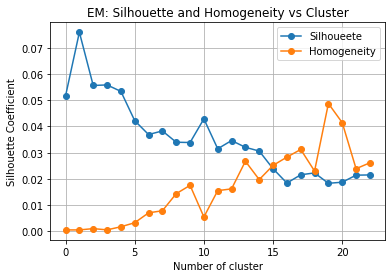

In [135]:
plt.figure()
plt.title("EM: Silhouette and Homogeneity vs Cluster")
plt.plot(gdf[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(['Silhoueete', 'Homogeneity'])
plt.show()

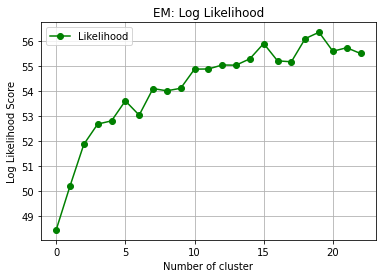

In [136]:
plt.figure()
plt.title("EM: Log Likelihood")
plt.plot(gdf[['Likelihood']], 'o-', color="green")
plt.xlabel("Number of cluster")
plt.ylabel("Log Likelihood Score")
plt.grid()
plt.legend(['Likelihood'])
plt.show()

In [130]:
nn = MLPClassifier()
nn.fit(ica_result, y_train['price_range'].values)

MLPClassifier()

In [131]:
y_pred = nn.predict(ica_result)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)
print(classification_report(y_train, y_pred))

0.9818181818181818
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       660
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

